<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Load the dataset into a dataframe.


In [19]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")
df.head(3)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy


## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


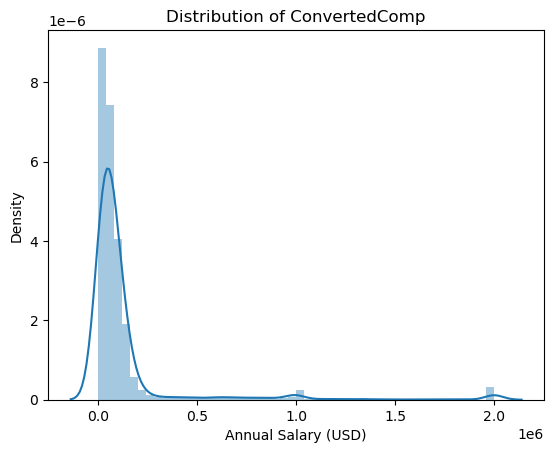

In [20]:
# Plot the distribution curve
# Create distribution plot
sns.distplot(df['ConvertedComp'])

plt.title('Distribution of ConvertedComp')
plt.xlabel('Annual Salary (USD)')
plt.show()

Plot the histogram for the column `ConvertedComp`.


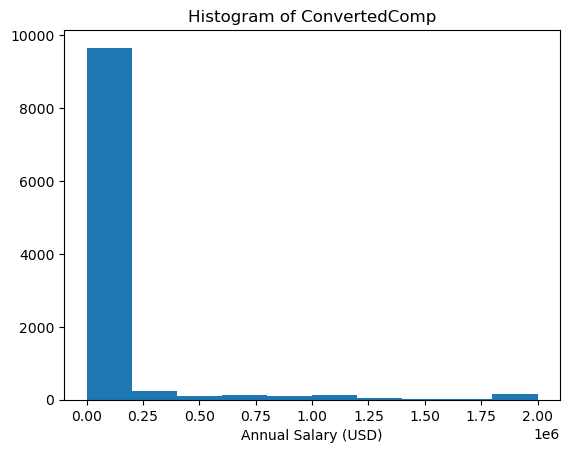

In [21]:
# your code goes here
plt.hist(df['ConvertedComp'])

# Add labels and title
plt.xlabel('Annual Salary (USD)')
plt.title('Histogram of ConvertedComp')
plt.show()

What is the median of the column `ConvertedComp`?


In [22]:
# your code goes here
median = df['ConvertedComp'].median()
print("Median of ConvertedComp column:", median)

Median of ConvertedComp column: 57745.0


How many responders identified themselves only as a **Man**?


In [23]:
# your code goes here
# df['Gender'].value_counts() # Counts and sums up the unqiue value in the column 

#------ OR -------#

# man_count = df.loc[df['Gender'] == 'Man'].shape[0]

#--------- OR ----------#

man_count = df[df['Gender'] == 'Man']['Gender'].value_counts(dropna=False)
print("Number of responders who identified themselves only as a man:", man_count[0])

Number of responders who identified themselves only as a man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [24]:
# your code goes here

woman_median = df.loc[df['Gender'] == 'Woman']['ConvertedComp'].median()
print("Median ConvertedComp of responders identified themselves only as a woman:", woman_median)

Median ConvertedComp of responders identified themselves only as a woman: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [25]:
# your code goes here
df['Age'].describe(include='all')

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


<AxesSubplot:ylabel='Frequency'>

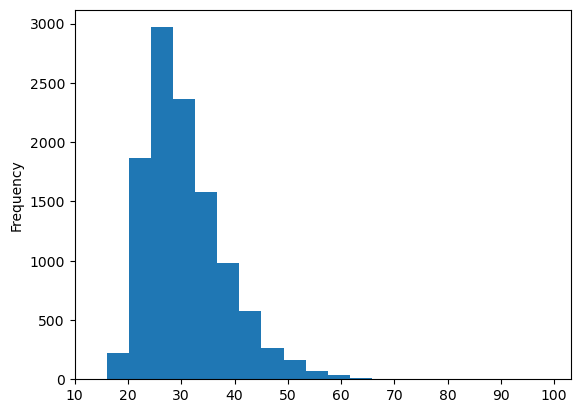

In [26]:
# your code goes here
df['Age'].plot(kind = 'hist',bins = 20, xticks = [10,20,30,40,50,60,70,80,90, 100])

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:ylabel='ConvertedComp'>

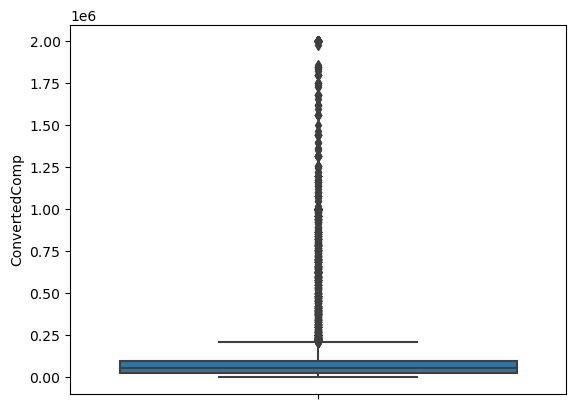

In [27]:
# your code goes here
# df['ConvertedComp'].plot(kind= 'box')

#------ OR -------#

sns.boxplot(y=df['ConvertedComp'])

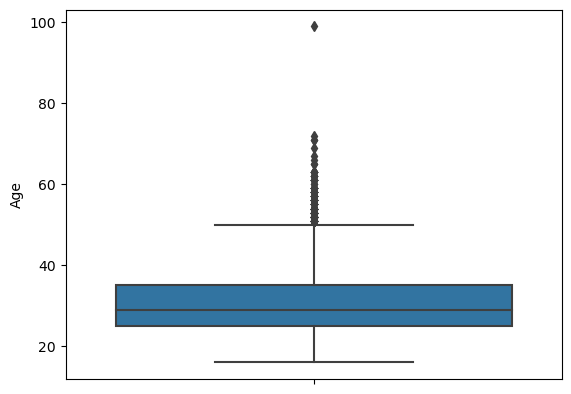

In [28]:
sns.boxplot(y=df['Age']) # checking outliers in the Age column with box plot
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [11]:
# your code goes here
q1=df['ConvertedComp'].quantile(0.25)
q3=df['ConvertedComp'].quantile(0.75)

print('Q1',q1)
print('Q3',q3)

IQR=q3-q1
print('The Inter Quartile Range for the column ConvertedComp:',IQR)

Q1 26868.0
Q3 100000.0
The Inter Quartile Range for the column ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [12]:
# your code goes here
whiskers = 1.5*IQR

lower = df.ConvertedComp.describe()[4] - whiskers
upper = df.ConvertedComp.describe()[6] + whiskers

print(f"Upper bound: {upper} \nLower bound: {lower}")

Upper bound: 209698.0 
Lower bound: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [13]:
# your code goes here
outliers = df[(df['ConvertedComp'] < (q1 - 1.5 * IQR)) | (df['ConvertedComp'] > (q3 + 1.5 * IQR))]

print("Number of outliers in ConvertedComp column:", outliers.shape[0])

Number of outliers in ConvertedComp column: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [14]:
# your code goes here
# clean_df = df.drop(outliers.index)

#-------- OR --------#

clean_df = df[~df.index.isin(outliers.index)]

print("Number of outliers removed:", outliers.shape[0])
print("Number of rows in clean_df:", clean_df.shape[0])

Number of outliers removed: 879
Number of rows in clean_df: 10519


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [15]:
# your code goes here
age_corr = df.corr()['Age'].drop('Age')
age_corr

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
